The main goal of this project is to predict the success of a movie. For that, let's admit the success of a movie is represented by its gross revenue. Then, our target is gross. 

# Data Preprocessing

In [2]:
#importer le fichier csv
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
path="/content/drive/MyDrive/Project/archive (2).zip"
df=pd.read_csv(path, encoding="UTF-8", sep=',')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
#dropping rows with missing malues
df.dropna(subset = ["released"], inplace=True)

In [7]:
df.dropna(subset = ["score"], inplace=True)

In [8]:
df.dropna(subset = ["votes"], inplace=True)

In [9]:
df.dropna(subset = ["writer"], inplace=True)

In [10]:
df.dropna(subset = ["country"], inplace=True)

In [11]:
df.dropna(subset = ["budget"], inplace=True)

In [12]:
df.dropna(subset = ["gross"], inplace=True)

In [13]:
df.dropna(subset = ["company"], inplace=True)

In [14]:
df.dropna(subset = ["runtime"], inplace=True)

In [15]:
df.isnull().sum()
#No more missing values

name         0
rating      11
genre        0
year         0
released     0
score        0
votes        0
director     0
writer       0
star         0
country      0
budget       0
gross        0
company      0
runtime      0
dtype: int64

In [16]:
#Let's start feature transformation step
df.info() #Checking out categorical values presence

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5432 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5432 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5432 non-null   object 
 3   year      5432 non-null   int64  
 4   released  5432 non-null   object 
 5   score     5432 non-null   float64
 6   votes     5432 non-null   float64
 7   director  5432 non-null   object 
 8   writer    5432 non-null   object 
 9   star      5432 non-null   object 
 10  country   5432 non-null   object 
 11  budget    5432 non-null   float64
 12  gross     5432 non-null   float64
 13  company   5432 non-null   object 
 14  runtime   5432 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 679.0+ KB


In [17]:
df["genre"].value_counts()

Comedy       1496
Action       1416
Drama         868
Crime         400
Adventure     327
Biography     311
Animation     278
Horror        253
Fantasy        42
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: genre, dtype: int64

In [18]:
#Label Encoder using dictionary
NewGenre={
"genre" : {"Comedy":0,"Action":1,"Drama":2,"Crime":3,"Adventure":4,"Biography":5,"Animation":6,"Horror":7,"Fantasy":8,"Mystery":9,"Thriller":10,"Sci-Fi":11,"Romance":12,"Family":13,"Western":14}
}
df.replace(NewGenre, inplace=True)

In [19]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,2,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,4,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,1,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,0,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,0,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [20]:
df["rating"].value_counts()

R            2597
PG-13        1729
PG            907
G             111
Not Rated      44
Unrated        17
NC-17          12
TV-MA           2
X               1
Approved        1
Name: rating, dtype: int64

In [21]:
NewRating={
"rating":{"R":0,"PG-13":1,"PG":2,"G":3,"Not Rated":4,"Unrated":5,"NC-17":6,"TV-MA":7,"X":8,"Approved":9}
}
df.replace(NewRating, inplace=True)

In [22]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,0.0,2,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,0.0,4,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,2.0,1,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,2.0,0,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,0.0,0,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5432 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5432 non-null   object 
 1   rating    5421 non-null   float64
 2   genre     5432 non-null   int64  
 3   year      5432 non-null   int64  
 4   released  5432 non-null   object 
 5   score     5432 non-null   float64
 6   votes     5432 non-null   float64
 7   director  5432 non-null   object 
 8   writer    5432 non-null   object 
 9   star      5432 non-null   object 
 10  country   5432 non-null   object 
 11  budget    5432 non-null   float64
 12  gross     5432 non-null   float64
 13  company   5432 non-null   object 
 14  runtime   5432 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 679.0+ KB


In [24]:
#Adjusting data types and transforming columns

df.budget = df.budget.astype(int)
df.gross = df.gross.astype(int)
df.votes = df.votes.astype(int)

df['released_date'] = df.released.str.split('(', expand=True)[0]
df['released_date'] = pd.to_datetime(df.released_date)
df['year'] = df.released_date.dt.year
df['released_country'] = df.released.str.split('(', expand=True)[1].str.replace(r'[^a-zA-Z\d\s:]', '')
df = df.drop('released', axis=1)

In [25]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_country
0,The Shining,0.0,2,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States
1,The Blue Lagoon,0.0,4,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,2.0,1,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States
3,Airplane!,2.0,0,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States
4,Caddyshack,0.0,0,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5432 entries, 0 to 7652
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              5432 non-null   object        
 1   rating            5421 non-null   float64       
 2   genre             5432 non-null   int64         
 3   year              5432 non-null   int64         
 4   score             5432 non-null   float64       
 5   votes             5432 non-null   int64         
 6   director          5432 non-null   object        
 7   writer            5432 non-null   object        
 8   star              5432 non-null   object        
 9   country           5432 non-null   object        
 10  budget            5432 non-null   int64         
 11  gross             5432 non-null   int64         
 12  company           5432 non-null   object        
 13  runtime           5432 non-null   float64       
 14  released_date     5432 n

# Data Visualization

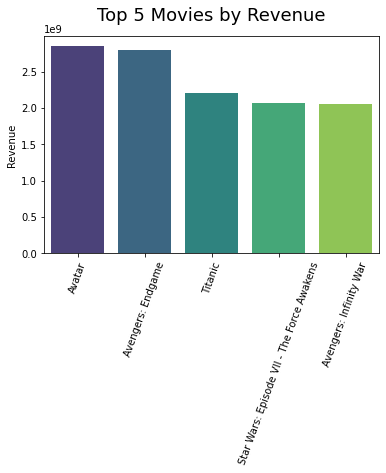

In [27]:
#The top 5 movies by gross revenue

import matplotlib.pyplot as plt
import seaborn as sns

Five = df.sort_values(by='gross', ascending=False).head(5)
sns.barplot(x='name', y='gross', data=Five, palette='viridis');
plt.xticks(rotation=70);
plt.xlabel('');
plt.ylabel('Revenue');
plt.title('Top 5 Movies by Revenue', loc='center', fontsize=18, pad=15);

Text(0, 0.5, 'Revenue (In Millions)')

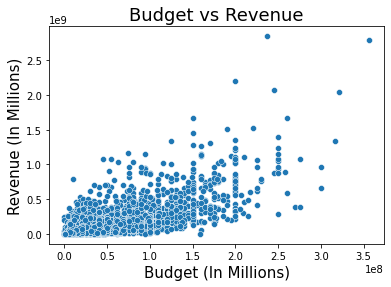

In [28]:
#Budget by gross revenue 

sns.scatterplot(x='budget', y='gross', data=df,)
plt.title('Budget vs Revenue', fontsize=18)
plt.xlabel('Budget (In Millions)', fontsize=15) 
plt.ylabel('Revenue (In Millions)', fontsize=15)

We can see in this scatter plot that there is a correlation between the budget and the gross of the movie. Generally, more bigger the budget, more bigger the revenue will be.

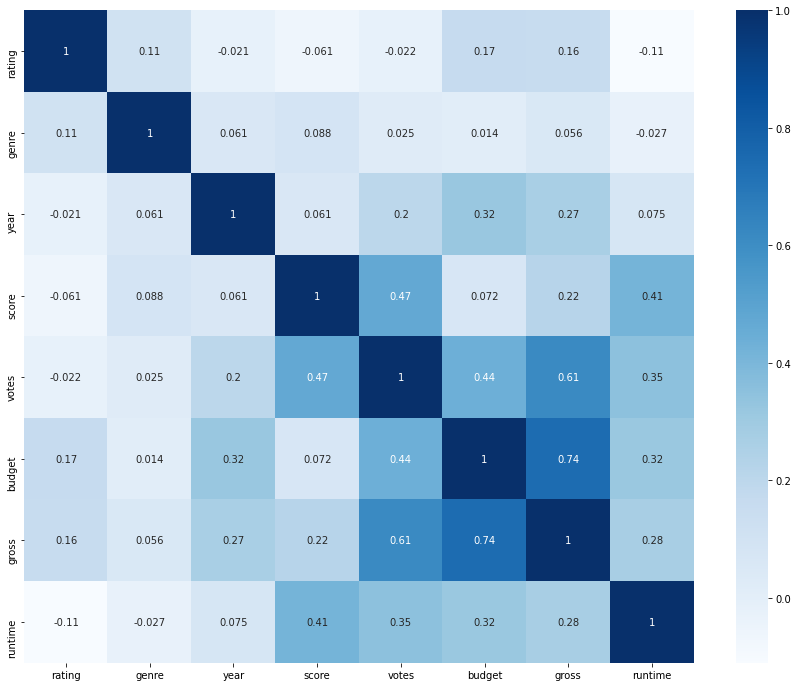

In [29]:
#Correlation Matrix of numeric features
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='Blues');

In the correlation matrix above, we can clearly see the correlation of the gross with the votes and the budget (>60% both).

In [30]:
#Now let's build a correlation matrix for all the features 

#To do that, we have to convert all categoric values into numeric ones

df_n = df.copy()
for col in df_n.columns:
    if df_n[col].dtype == 'object':
        df_n[col] = df_n[col].astype('category').cat.codes
df_n.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_country
0,4702,0.0,2,1980,8.4,927000,1797,2838,699,46,19000000,46998772,1431,146.0,1980-06-13,47
1,3939,0.0,4,1980,5.8,65000,1580,1159,214,47,4500000,58853106,454,104.0,1980-07-02,47
2,3651,2.0,1,1980,8.7,1200000,759,1821,1160,47,18000000,538375067,948,124.0,1980-06-20,47
3,205,2.0,0,1980,7.7,221000,891,1415,1477,47,3500000,83453539,1113,88.0,1980-07-02,47
4,734,0.0,0,1980,7.3,108000,721,351,271,47,6000000,39846344,1088,98.0,1980-07-25,47


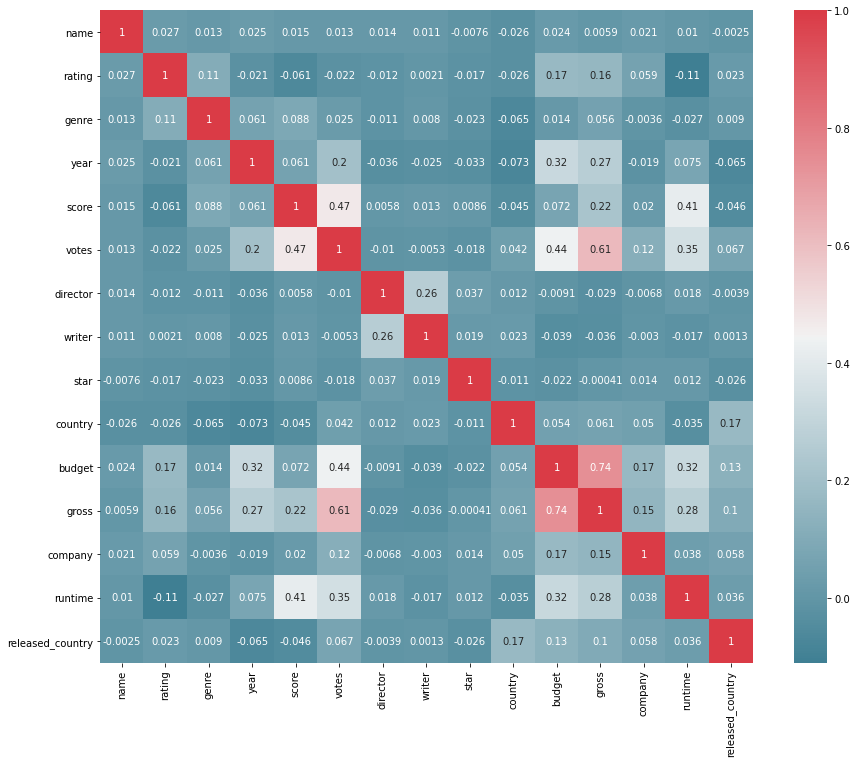

In [31]:
import numpy as np

f, ax = plt.subplots(figsize=(15, 12))
corr = df_n.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Here, we see other interesting features : runtime, year and score.

# Supervised learning

In [32]:
#Linear regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

#Create train and test sets

x = df["budget"].values[:,np.newaxis]
y = df["gross"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 1.4656794584593586e+16
R squared 0.5528463902614724


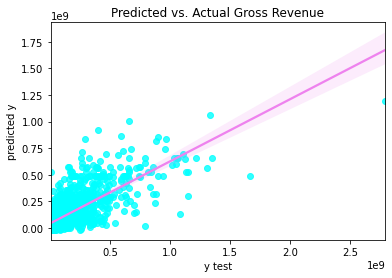

In [33]:
ax = sns.regplot(x=y_test, y=model.predict(x_test),
                scatter_kws={'color': 'cyan'}, line_kws={'color':'violet'});
ax.set(xlabel='y test', ylabel='predicted y');
ax.set(title='Predicted vs. Actual Gross Revenue');

We have a linear regression with a 55% rate of accuracy. it's not sufficient, we want more, so we'll change our model to improve it

In [72]:
#Multi linear regression

X = df[['budget', 'votes', 'runtime', 'year', 'score']]
y = df["gross"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.36, random_state=1)

model=LinearRegression() #build linear regression model
model.fit(X_train,y_train) #fitting the training data
predicted=model.predict(X_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 1.0786860165967018e+16
R squared 0.6946124595547913


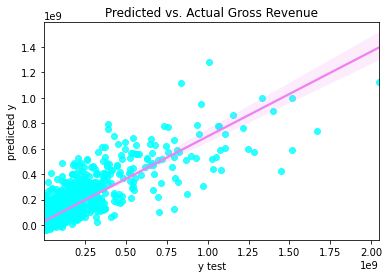

In [73]:
ax = sns.regplot(x=y_test, y=model.predict(X_test),
                scatter_kws={'color': 'cyan'}, line_kws={'color':'violet'});
ax.set(xlabel='y test', ylabel='predicted y');
ax.set(title='Predicted vs. Actual Gross Revenue');

We got a model with a 69% rate of accuracy. It's much better.

In [78]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['budget', 'votes', 'runtime', 'year', 'score']]=scaler.fit_transform(df[['budget', 'votes', 'runtime', 'year', 'score']].values)
df["gross"]=scaler.fit_transform(df[["gross"]].values)


In [77]:
X = df[['budget', 'votes', 'runtime', 'year', 'score']]
y = df["gross"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.36, random_state=1)

model=LinearRegression() #build linear regression model
model.fit(X_train,y_train) #fitting the training data
predicted=model.predict(X_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.3080097919185613
R squared 0.6946124595547913


To answer the problematic, I have chosen a machine learning model based on linear regression, since our target is a numeric value. Thanks to the data visualization step, I selected the features with the higher correlation rate with the target (using correlation matrix). To conlude, I have reached a 69% accuracy rate of prediction by using multi linear regression (since more than one feature was correlated with the output).